In [1]:
import pandas as pd

# Age: 개인의 나이를 나타냅니다.
# Annual_Income: 개인의 연간 소득을 나타냅니다.
# Monthly_Inhand_Salary: 개인의 월별 기본 급여를 나타냅니다.
# Num_Bank_Accounts: 개인이 보유한 은행 계좌의 수를 나타냅니다.
# Num_Credit_Card: 개인이 보유한 다른 신용카드의 수를 나타냅니다.
# Interest_Rate: 신용카드의 이자율을 나타냅니다.
# Num_of_Loan: 은행에서 받은 대출의 수를 나타냅니다.
# Delay_from_due_date: 결제일로부터 평균적으로 지연된 일수를 나타냅니다.
# Num_of_Delayed_Payment: 개인이 평균적으로 지연된 지불 건수를 나타냅니다.
# Changed_Credit_Limit: 신용카드 한도의 백분율 변화를 나타냅니다.
# Num_Credit_Inquiries: 신용카드 조회 건수를 나타냅니다.
# Credit_Mix: 신용 혼합의 분류를 나타냅니다.
# Outstanding_Debt: 상환해야 할 잔존 부채를 미화로 나타냅니다.
# Credit_Utilization_Ratio: 신용카드 이용률을 나타냅니다.
# Credit_History_Age: 개인의 신용 이력 연령을 나타냅니다.
# Payment_of_Min_Amount: 개인이 최소 금액만 지불했는지 여부를 나타냅니다.
# Total_EMI_per_month: 월별 EMI 지불액을 미화로 나타냅니다.
# Amount_invested_monthly: 고객이 월별로 투자한 금액을 미화로 나타냅니다.
# Monthly_Balance: 고객의 월별 잔고액을 미화로 나타냅니다.
# Credit_Score: 신용점수의 범주를 나타냅니다 (나쁨, 표준, 양호).

first_data = pd.read_csv('./dataset/project/Score.csv')
ft = first_data.copy()
ft

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99955,23.0,7.0,3.0,34.663572,378.0,No,60.971333,479.866228,Poor,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
99956,18.0,7.0,3.0,40.565631,379.0,No,54.185950,496.651610,Poor,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
99957,27.0,6.0,3.0,41.255522,380.0,No,24.028477,516.809083,Poor,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
99958,20.0,6.0,3.0,33.638208,381.0,No,251.672582,319.164979,Standard,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023


In [9]:
ft['Credit_Score'].value_counts()

Credit_Score
2    30612
1    11638
0     7874
Name: count, dtype: int64

In [2]:
ft['Credit_Score'] = ft.pop('Credit_Score')

In [3]:
from sklearn.preprocessing import LabelEncoder

Amount_encoder = LabelEncoder()
Amount = Amount_encoder.fit_transform(ft['Payment_of_Min_Amount'].tolist())
ft['Payment_of_Min_Amount'] = Amount

Mix_encoder = LabelEncoder()
Mix = Mix_encoder.fit_transform(ft['Credit_Mix'].tolist())
ft['Credit_Mix'] = Mix

Behaviour_encoder = LabelEncoder()
Behaviour = Behaviour_encoder.fit_transform(ft['Payment_Behaviour'].tolist())
ft['Payment_Behaviour'] = Behaviour

score_encoder = LabelEncoder()
score = score_encoder.fit_transform(ft['Credit_Score'].tolist())
ft['Credit_Score'] = score

In [4]:
from sklearn.preprocessing import StandardScaler

features = ft.iloc[:, :-1]

std = StandardScaler()
std_features = std.fit_transform(features)
std_under_h_df = pd.DataFrame(std_features, columns=features.columns)

for column in std_under_h_df.columns:
    std_under_h_df.drop(
        std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)

for column in std_under_h_df.columns:
    print(f'{column}: {std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].shape[0]}건')


Delay_from_due_date: 0건
Num_of_Delayed_Payment: 0건
Num_Credit_Inquiries: 0건
Credit_Utilization_Ratio: 0건
Credit_History_Age: 0건
Payment_of_Min_Amount: 0건
Amount_invested_monthly: 0건
Monthly_Balance: 0건
Credit_Mix: 0건
Payment_Behaviour: 0건
Age: 0건
Annual_Income: 0건
Num_Bank_Accounts: 0건
Num_Credit_Card: 0건
Interest_Rate: 0건
Num_of_Loan: 0건
Monthly_Inhand_Salary: 0건
Changed_Credit_Limit: 0건
Outstanding_Debt: 0건
Total_EMI_per_month: 0건


In [5]:
ft = ft.iloc[std_under_h_df.index].reset_index(drop=True)
ft

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Mix,Payment_Behaviour,...,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Credit_Score
0,3.0,7.0,4.0,26.822620,265.0,1,80.415295,312.494089,1,1,...,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949,0
1,3.0,7.0,4.0,31.944960,265.0,1,118.280222,284.629162,1,1,...,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949,0
2,3.0,7.0,4.0,28.609352,267.0,1,81.699521,331.209863,1,1,...,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949,0
3,5.0,4.0,4.0,31.377862,268.0,1,199.458074,223.451310,1,1,...,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949,0
4,6.0,4.0,4.0,24.797347,269.0,1,41.420153,341.489231,1,1,...,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50119,23.0,7.0,3.0,34.663572,378.0,1,60.971333,479.866228,1,1,...,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023,1
50120,18.0,7.0,3.0,40.565631,379.0,1,54.185950,496.651610,1,1,...,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023,1
50121,27.0,6.0,3.0,41.255522,380.0,1,24.028477,516.809083,1,1,...,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023,1
50122,20.0,6.0,3.0,33.638208,381.0,1,251.672582,319.164979,1,1,...,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023,2


In [114]:
# columns_to_replace_with_mean = ['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Credit_History_Age',
#                                'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance', 'Age', 'Annual_Income', 'Num_Bank_Accounts',
#                                'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month']

# for column in columns_to_replace_with_mean:
#     ft[column].fillna(ft[column].mean(), inplace=True)

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

features, targets = ft.iloc[:, :-1], ft.Credit_Score

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

dtc.fit(X_train_over.values, y_train_over.values)



evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

y_train_over.value_counts()

Credit_Score
1    24490
2    24490
0    24490
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    # auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

dtc_parameter = {'max_depth':[1,2,3,4], 'min_samples_split':[30000,40000,50000]}
# svc_parameter = {'svc__C' : [0.001,0.01,0.1,1,10,100], 'svc__gamma' : [0.001,0.01,0.1,1,10,100], 'svc__kernel' : ['linear', 'rbf']}
knn_c_parameter = {'knn__n_neighbors' : [3,5,7,9,11]}
rfc_parameters = {
    'rfc__max_depth': [1, 2, 3],
    'rfc__min_samples_split': [6, 12, 18, 24]
}
ada_parmeters = {
    'ada__n_estimators': [50, 100, 150],
    'ada__learning_rate': [0.4, 0.7, 1]
}

gbc_parameters = {
    'gbc__n_estimators': [50, 100, 150],
    'gbc__learning_rate': [0.4, 0.7, 1]
}

xgb_parameters = {
    'xgb__n_estimators': [50, 100, 150],
    'xgb__learning_rate': [0.4, 0.7, 1]
}
lgbm_parameters = {
    'lgbm__n_estimators': [50, 100, 150],
    'lgbm__learning_rate': [0.4, 0.7, 1]
}

dtc = DecisionTreeClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=100)
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier(loss='log_loss')
xgb = XGBClassifier()
lgbm = LGBMClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameter, cv=5, refit=True, return_train_score=True)
# svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
# g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameter, cv=3, refit=True, return_train_score=True)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_c_parameter, cv=3, refit=True, return_train_score=True , n_jobs=-1)

rfc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('rfc', rfc)])
g_rfc = GridSearchCV(rfc_pipe, param_grid=rfc_parameters, cv=3, n_jobs=-1)

ada_pipe = Pipeline([('standard_scaler', StandardScaler()), ('ada', ada)])
g_ada = GridSearchCV(ada_pipe, param_grid=ada_parmeters, cv=3, n_jobs=-1)

gbc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('gbc', gbc)])
g_gbc = GridSearchCV(gbc_pipe, param_grid=gbc_parameters, cv=3, n_jobs=-1)

# xgb_pipe = Pipeline([('standard_scaler', StandardScaler()), ('xgb', xgb)])
g_xgb = GridSearchCV(xgb, param_grid=xgb_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

lgbm_pipe = Pipeline([('standard_scaler', StandardScaler()), ('lgbm', lgbm)])
g_lgbm = GridSearchCV(lgbm_pipe, param_grid=lgbm_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)




In [22]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_split': [30000, 40000, 50000]},
             return_train_score=True)

In [25]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [26]:
g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [1, 2, 3],
                         'rfc__min_samples_split': [6, 12, 18, 24]})

In [27]:
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('ada', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.4, 0.7, 1],
                         'ada__n_estimators': [50, 100, 150]})

In [17]:
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('gbc', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gbc__learning_rate': [0.4, 0.7, 1],
                         'gbc__n_estimators': [50, 100, 150]})

In [18]:
g_xgb.fit(X_train_over, y_train_over,early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-mlogloss:0.92980	validation_1-mlogloss:0.92942
[1]	validation_0-mlogloss:0.83151	validation_1-mlogloss:0.83100
[2]	validation_0-mlogloss:0.77150	validation_1-mlogloss:0.77009
[3]	validation_0-mlogloss:0.73052	validation_1-mlogloss:0.72906
[4]	validation_0-mlogloss:0.70446	validation_1-mlogloss:0.70195


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:01:44] WARNING: D:\bld\xgboost-split_1712073657315\work\src\learner.cc:742: 
Parameters: { "xgb__learning_rate", "xgb__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	validation_0-mlogloss:0.68715	validation_1-mlogloss:0.68409
[6]	validation_0-mlogloss:0.67460	validation_1-mlogloss:0.67090
[7]	validation_0-mlogloss:0.66268	validation_1-mlogloss:0.65815
[8]	validation_0-mlogloss:0.65446	validation_1-mlogloss:0.65037
[9]	validation_0-mlogloss:0.64638	validation_1-mlogloss:0.64191
[10]	validation_0-mlogloss:0.63793	validation_1-mlogloss:0.63302
[11]	validation_0-mlogloss:0.63204	validation_1-mlogloss:0.62656
[12]	validation_0-mlogloss:0.62582	validation_1-mlogloss:0.62100
[13]	validation_0-mlogloss:0.62084	validation_1-mlogloss:0.61613
[14]	validation_0-mlogloss:0.61433	validation_1-mlogloss:0.60998
[15]	validation_0-mlogloss:0.61012	validation_1-mlogloss:0.60555
[16]	validation_0-mlogloss:0.60511	validation_1-mlogloss:0.60068
[17]	validation_0-mlogloss:0.60121	validation_1-mlogloss:0.59698
[18]	validation_0-mlogloss:0.59707	validation_1-mlogloss:0.59250
[19]	validation_0-mlogloss:0.59184	validation_1-mlogloss:0.58752
[20]	validation_0-mlogloss:0.5

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.4, 0.7, 1],
                         'xgb__n_estimators': [50, 100, 150]},
             return_train_score=True)

In [19]:
g_lgbm.fit(X_train_over, y_train_over, lgbm__eval_set=evals)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4340
[LightGBM] [Info] Number of data points in the train set: 73470, number of used features: 20
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('lgbm', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'lgbm__learning_rate': [0.4, 0.7, 1],
                         'lgbm__n_estimators': [50, 100, 150]},
             return_train_score=True)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 30000}",0.545338,7
1,"{'max_depth': 1, 'min_samples_split': 40000}",0.545338,7
2,"{'max_depth': 1, 'min_samples_split': 50000}",0.545338,7
3,"{'max_depth': 2, 'min_samples_split': 30000}",0.597101,1
4,"{'max_depth': 2, 'min_samples_split': 40000}",0.587560,4
5,"{'max_depth': 2, 'min_samples_split': 50000}",0.545338,7
6,"{'max_depth': 3, 'min_samples_split': 30000}",0.597101,1
7,"{'max_depth': 3, 'min_samples_split': 40000}",0.587560,4
8,"{'max_depth': 3, 'min_samples_split': 50000}",0.545338,7
9,"{'max_depth': 4, 'min_samples_split': 30000}",0.597101,1


오차 행렬
[[1254   51  270]
 [ 441 1606  281]
 [ 932 1245 3945]]
정확도: 0.6788, 정밀도: 0.6361, 재현율: 0.7102, F1: 0.6514
################################################################################


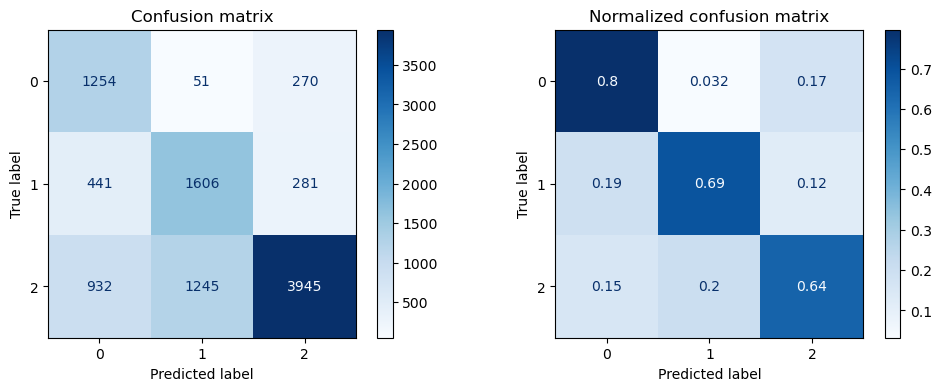

In [29]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)
get_evaluation(y_test, prediction, dtc, X_test)

,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.868912,1
1,{'knn__n_neighbors': 5},0.854607,2
2,{'knn__n_neighbors': 7},0.844494,3
3,{'knn__n_neighbors': 9},0.833524,4
4,{'knn__n_neighbors': 11},0.824908,5


오차 행렬
[[1290   49  236]
 [ 135 1889  304]
 [ 869  856 4397]]
정확도: 0.7557, 정밀도: 0.7097, 재현율: 0.7829, F1: 0.7332
################################################################################


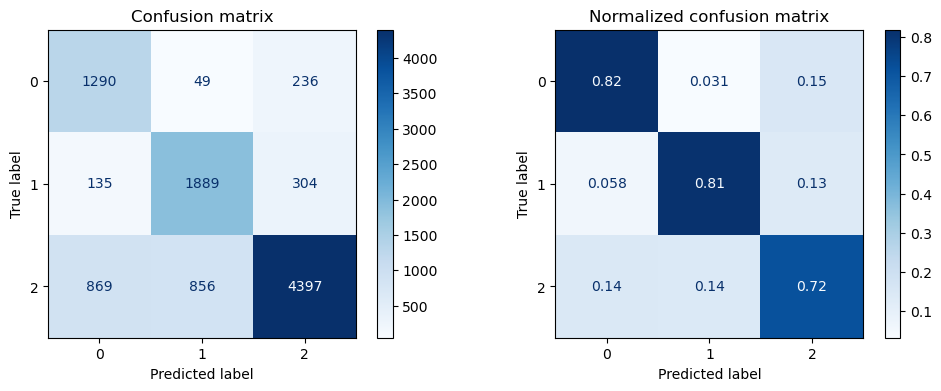

In [30]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)

knn = KNeighborsClassifier(n_neighbors=7)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])

knn_pipe.fit(X_train_over, y_train_over)

prediction = knn_pipe.predict(X_test)
get_evaluation(y_test, prediction, knn_pipe, X_test)

,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.692990,10
1,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.698829,9
2,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.676194,12
3,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.681598,11
4,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.750633,8
5,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.751014,6
6,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.751218,5
7,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.750946,7
8,"{'rfc__max_depth': 3, 'rfc__min_samples_split'...",0.754553,2
9,"{'rfc__max_depth': 3, 'rfc__min_samples_split'...",0.754961,1


오차 행렬
[[1256   17  302]
 [ 443 1539  346]
 [ 957  717 4448]]
정확도: 0.7225, 정밀도: 0.6743, 재현율: 0.7284, F1: 0.6852
################################################################################


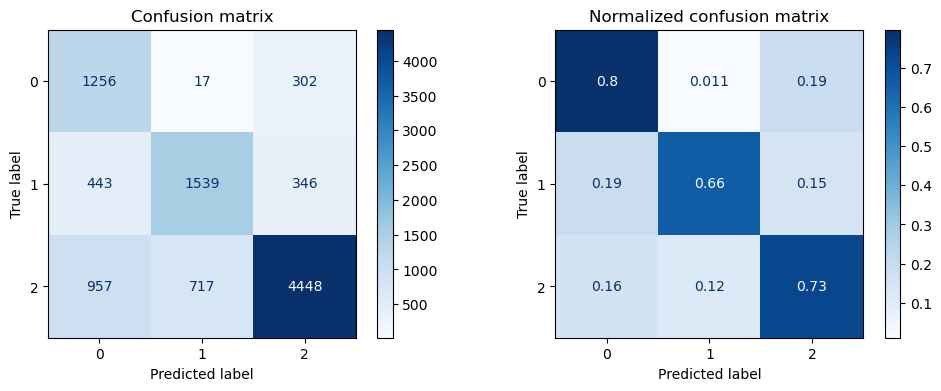

In [31]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)

rfc = g_rfc.best_estimator_

prediction = rfc.predict(X_test)
get_evaluation(y_test, prediction, rfc, X_test)

,params,mean_test_score,rank_test_score
0,"{'ada__learning_rate': 0.4, 'ada__n_estimators...",0.740887,7
1,"{'ada__learning_rate': 0.4, 'ada__n_estimators...",0.743324,6
2,"{'ada__learning_rate': 0.4, 'ada__n_estimators...",0.743909,5
3,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.740207,8
4,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.744385,4
5,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.744903,3
6,"{'ada__learning_rate': 1, 'ada__n_estimators':...",0.738478,9
7,"{'ada__learning_rate': 1, 'ada__n_estimators':...",0.745624,2
8,"{'ada__learning_rate': 1, 'ada__n_estimators':...",0.750143,1


오차 행렬
[[1228   24  323]
 [ 397 1386  545]
 [ 895  609 4618]]
정확도: 0.7214, 정밀도: 0.6719, 재현율: 0.7098, F1: 0.6777
################################################################################


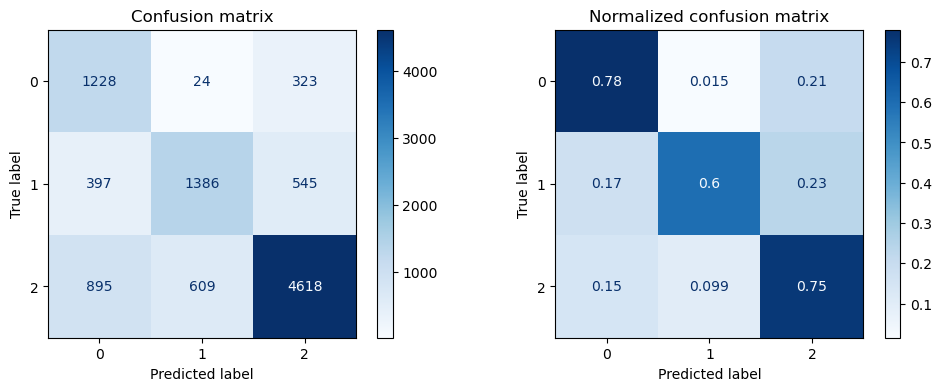

In [32]:
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(ada_result_df)
ada = g_ada.best_estimator_

prediction = ada.predict(X_test)
get_evaluation(y_test, prediction, ada, X_test)

,params,mean_test_score,rank_test_score
0,"{'gbc__learning_rate': 0.4, 'gbc__n_estimators...",0.786525,9
1,"{'gbc__learning_rate': 0.4, 'gbc__n_estimators...",0.803675,6
2,"{'gbc__learning_rate': 0.4, 'gbc__n_estimators...",0.814060,4
3,"{'gbc__learning_rate': 0.7, 'gbc__n_estimators...",0.797836,7
4,"{'gbc__learning_rate': 0.7, 'gbc__n_estimators...",0.812876,5
5,"{'gbc__learning_rate': 0.7, 'gbc__n_estimators...",0.821383,2
6,"{'gbc__learning_rate': 1, 'gbc__n_estimators':...",0.796107,8
7,"{'gbc__learning_rate': 1, 'gbc__n_estimators':...",0.814237,3
8,"{'gbc__learning_rate': 1, 'gbc__n_estimators':...",0.822594,1


오차 행렬
[[1135   23  417]
 [  70 1710  548]
 [ 492  551 5079]]
정확도: 0.7904, 정밀도: 0.7526, 재현율: 0.7616, F1: 0.7568
################################################################################


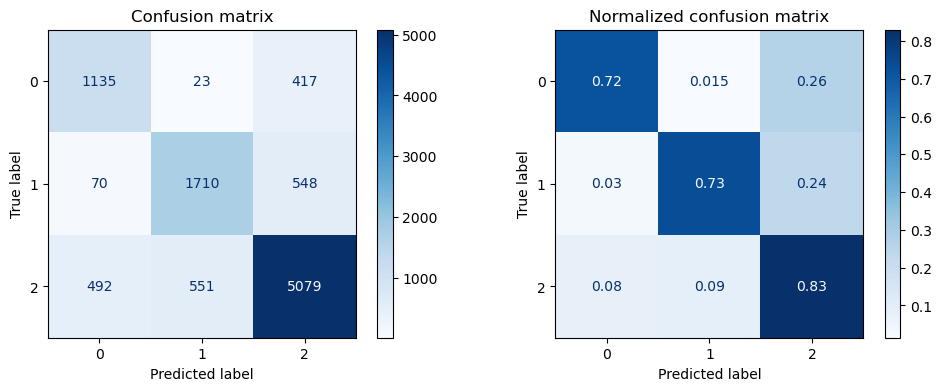

In [33]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbc_result_df)
gbc = g_gbc.best_estimator_

prediction = gbc.predict(X_test)
get_evaluation(y_test, prediction, gbc, X_test)

,params,mean_test_score,rank_test_score
0,"{'xgb__learning_rate': 0.4, 'xgb__n_estimators...",0.854553,1
1,"{'xgb__learning_rate': 0.4, 'xgb__n_estimators...",0.854553,1
2,"{'xgb__learning_rate': 0.4, 'xgb__n_estimators...",0.854553,1
3,"{'xgb__learning_rate': 0.7, 'xgb__n_estimators...",0.854553,1
4,"{'xgb__learning_rate': 0.7, 'xgb__n_estimators...",0.854553,1
5,"{'xgb__learning_rate': 0.7, 'xgb__n_estimators...",0.854553,1
6,"{'xgb__learning_rate': 1, 'xgb__n_estimators':...",0.854553,1
7,"{'xgb__learning_rate': 1, 'xgb__n_estimators':...",0.854553,1
8,"{'xgb__learning_rate': 1, 'xgb__n_estimators':...",0.854553,1


오차 행렬
[[1199   10  366]
 [ 104 1787  437]
 [ 504  538 5080]]
정확도: 0.8046, 정밀도: 0.7641, 재현율: 0.7862, F1: 0.7739
################################################################################


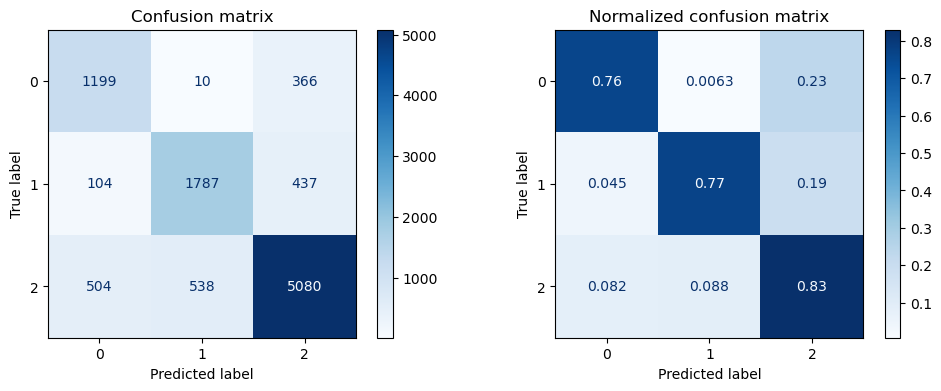

In [34]:
xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(xgb_result_df)
xgb = g_xgb.best_estimator_

prediction = xgb.predict(X_test)
get_evaluation(y_test, prediction, xgb, X_test)

,params,mean_test_score,rank_test_score
0,"{'lgbm__learning_rate': 0.4, 'lgbm__n_estimato...",0.842425,6
1,"{'lgbm__learning_rate': 0.4, 'lgbm__n_estimato...",0.858160,4
2,"{'lgbm__learning_rate': 0.4, 'lgbm__n_estimato...",0.865074,1
3,"{'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...",0.846903,5
4,"{'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...",0.859997,2
5,"{'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...",0.859153,3
6,"{'lgbm__learning_rate': 1, 'lgbm__n_estimators...",0.811406,7
7,"{'lgbm__learning_rate': 1, 'lgbm__n_estimators...",0.804464,8
8,"{'lgbm__learning_rate': 1, 'lgbm__n_estimators...",0.791874,9


오차 행렬
[[1166   11  398]
 [  35 1821  472]
 [ 398  517 5207]]
정확도: 0.8174, 정밀도: 0.7871, 재현율: 0.7910, F1: 0.7890
################################################################################


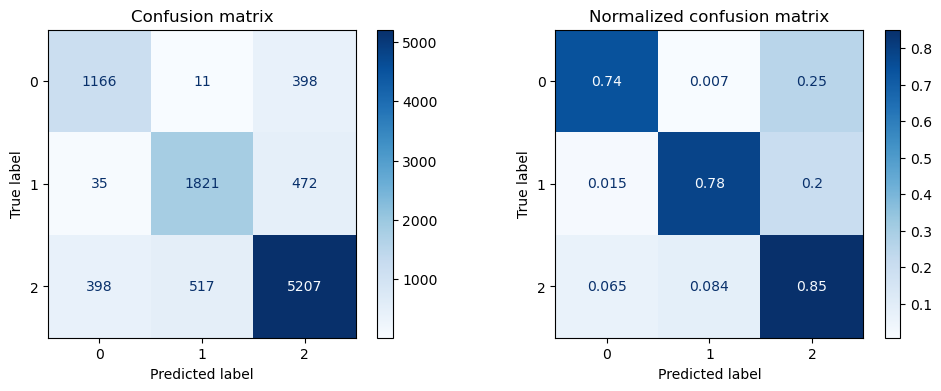

In [35]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(lgbm_result_df)
lgbm = g_lgbm.best_estimator_

prediction = lgbm.predict(X_test)
get_evaluation(y_test, prediction, lgbm, X_test)

In [36]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('dtc', dtc), 
                             ('knn', knn_pipe), 
                             ('rfc', rfc),('ada', ada),('gbc', gbc),('xgb', xgb),('lgbm', lgbm)], 
                 voting='hard', 
                 n_jobs=-1)

In [37]:
vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=2,
                                                     min_samples_split=30000)),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=7))])),
                             ('rfc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('rfc',
                                               RandomForestClassifier(max_depth=3,
                                                                      min_samples_split=12))])),
                             ('ada',
                              Pipeline(st...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('lgbm',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('lgbm',
                                               LGBMClassifier(learning_rate=0.4,
                                                              n_estimators=150))]))],
                 n_jobs=-1)

오차 행렬
[[1257    8  310]
 [ 259 1722  347]
 [ 751  573 4798]]
정확도: 0.7758, 정밀도: 0.7273, 재현율: 0.7738, F1: 0.7423
################################################################################


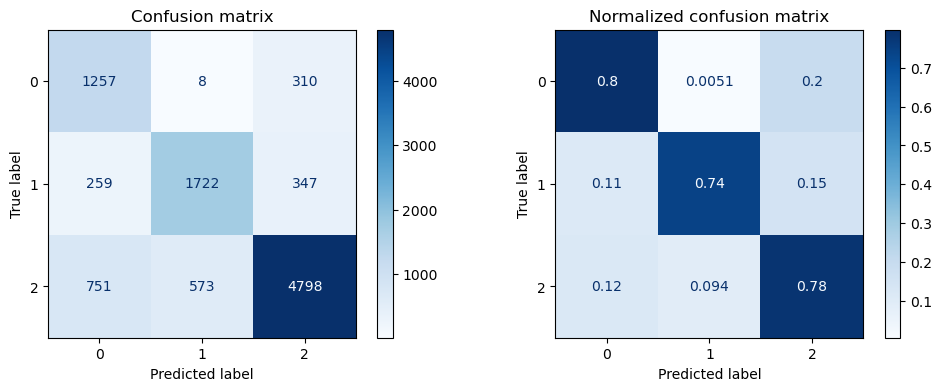

In [38]:
prediction = vc.predict(X_test)
get_evaluation(y_test, prediction, vc, X_test)

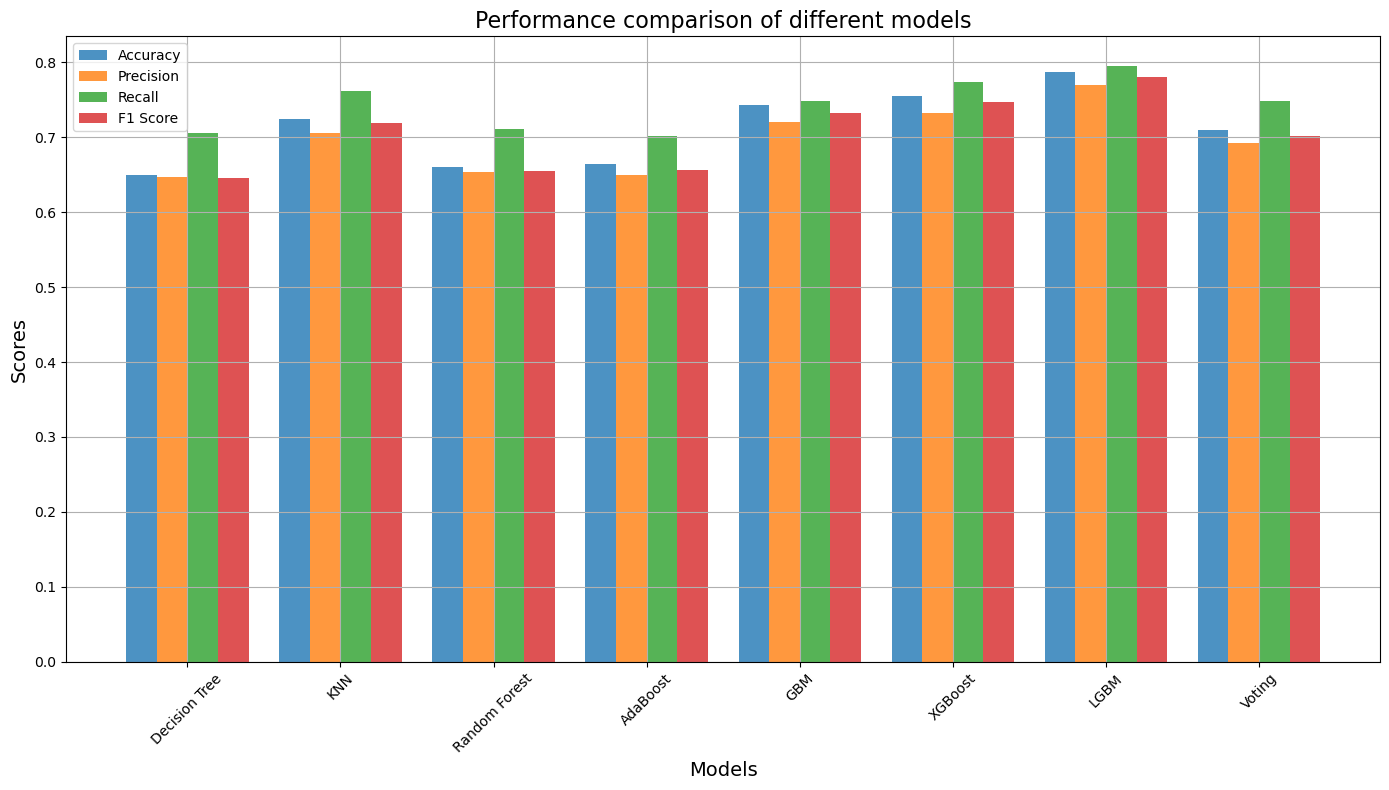

In [133]:
import matplotlib.pyplot as plt
import numpy as np

# 모델과 성능 지표를 리스트 형태로 준비
models = [
    "Decision Tree", "KNN", 
     "Random Forest", "AdaBoost", 
    "GBM", "XGBoost", "LGBM", 'Voting'
]
accuracies = [0.6501, 0.7249, 0.6603, 0.6644, 0.7435, 0.7551, 0.7876, 0.7093]
precisions = [0.6467, 0.7053, 0.6540, 0.6490, 0.7206, 0.7317, 0.7691, 0.6922]
recalls = [0.7052, 0.7623, 0.7114, 0.7013, 0.7486, 0.7734, 0.7949, 0.7479]
f1_scores = [0.6458  , 0.7187  , 0.6545  , 0.6559  , 0.7321  , 0.7466  , 0.7802  , 0.7012 ]

# 데이터를 numpy 배열로 변환
data = np.array([accuracies, precisions, recalls, f1_scores])

# 성능 지표의 이름
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# 그래프 그리기 설정
n_groups = len(models)
fig, ax = plt.subplots(figsize=(14, 8))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

# 각 지표별로 바 그래프를 그림
for i in range(data.shape[0]):
    plt.bar(index + i*bar_width, data[i], bar_width, alpha=opacity, label=metrics[i])

# 제목, 레이블, 범례 설정
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Performance comparison of different models', fontsize=16)
plt.xticks(index + 1.5*bar_width, models, rotation=45)
plt.legend()

# 그리드 표시
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()


1 Cycle

수치는 잘 나왔지만 더 좋은 수치를 찾아보자.
모델은 lgbm
최적의 파라미터 찾기 / 샘플링 다시하기

In [39]:
ft['Credit_Score'].value_counts()

Credit_Score
2    30612
1    11638
0     7874
Name: count, dtype: int64

In [40]:
output0 = ft[ft.Credit_Score == 0]
output1 = ft[ft.Credit_Score == 1].sample(7874, random_state=124)
output2 = ft[ft.Credit_Score == 2].sample(7874, random_state=124)

ft = pd.concat([output1, output0,output2]).reset_index(drop=True)
ft

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Mix,Payment_Behaviour,...,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Credit_Score
0,10.0,7.0,2.0,25.026973,238.0,1,195.171929,248.857394,1,0,...,16587.020,4.0,6.0,7.0,1.0,1668.251667,6.21,581.12,12.795845,1
1,42.0,16.0,6.0,28.229440,169.0,2,241.070499,415.032550,0,0,...,79241.120,7.0,5.0,29.0,8.0,6587.426667,22.32,2978.35,282.639618,1
2,0.0,2.0,2.0,35.387379,369.0,1,82.005372,474.588128,1,2,...,33479.220,5.0,4.0,12.0,0.0,2765.935000,11.70,1249.18,0.000000,1
3,12.0,16.0,10.0,38.179534,220.0,2,129.796486,297.375998,2,5,...,24004.500,4.0,3.0,14.0,5.0,1935.375000,12.30,1215.00,56.365016,1
4,29.0,19.0,8.0,35.017829,162.0,2,281.904934,506.768085,2,0,...,86771.080,8.0,3.0,18.0,5.0,7174.923333,19.24,85.79,218.819314,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23617,26.0,13.0,4.0,24.004260,202.0,2,197.383298,139.303730,2,1,...,60381.320,4.0,3.0,15.0,4.0,5154.776667,10.72,1311.32,170.263784,2
23618,17.0,18.0,4.0,25.466944,383.0,2,112.530444,346.374056,2,5,...,16944.540,8.0,5.0,16.0,0.0,1689.045000,13.04,1066.99,0.000000,2
23619,24.0,15.0,6.0,30.393827,269.0,2,86.560165,266.890032,2,2,...,16431.535,3.0,3.0,18.0,4.0,1431.294583,18.30,1461.64,49.679261,2
23620,8.0,14.0,4.0,34.498739,207.0,1,347.229478,447.867575,2,5,...,62827.470,4.0,7.0,16.0,1.0,5441.622500,10.77,1031.09,39.065197,2


In [42]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(g_lgbm, X_test, y_test , n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([ 8, 14, 18,  0, 11, 16, 19, 17,  2, 13,  5,  4, 12,  1, 15, 10,  6,
        7,  9,  3], dtype=int64)

In [43]:
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{ft.columns[i]}: {round(importance.importances_mean[i], 4)}')


Credit_Mix: 0.1357
Interest_Rate: 0.0955
Outstanding_Debt: 0.0637
Delay_from_due_date: 0.0411
Annual_Income: 0.039
Monthly_Inhand_Salary: 0.0318
Total_EMI_per_month: 0.0275
Changed_Credit_Limit: 0.026
Num_Credit_Inquiries: 0.0258
Num_Credit_Card: 0.0253
Payment_of_Min_Amount: 0.0244
Credit_History_Age: 0.0231
Num_Bank_Accounts: 0.0195
Num_of_Delayed_Payment: 0.0174
Num_of_Loan: 0.0163
Age: 0.013
Amount_invested_monthly: 0.01
Monthly_Balance: 0.0084
Payment_Behaviour: 0.0066
Credit_Utilization_Ratio: 0.0013


In [44]:
corr = ft.corr()
corr[['Credit_Score']].sort_values(by='Credit_Score', ascending=False)[1:]

,Credit_Score
Payment_of_Min_Amount,0.393870
Credit_Mix,0.329242
Changed_Credit_Limit,0.248282
Interest_Rate,0.246074
Num_of_Delayed_Payment,0.239469
Num_Bank_Accounts,0.219729
Delay_from_due_date,0.209220
Num_Credit_Inquiries,0.162217
Num_Credit_Card,0.147733
Num_of_Loan,0.124851


array([[<Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>],
       [<Axes: title={'center': 'Payment_of_Min_Amount'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>,
        <Axes: title={'center': 'Monthly_Balance'}>,
        <Axes: title={'center': 'Credit_Mix'}>,
        <Axes: title={'center': 'Payment_Behaviour'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>],
       [<Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Ax

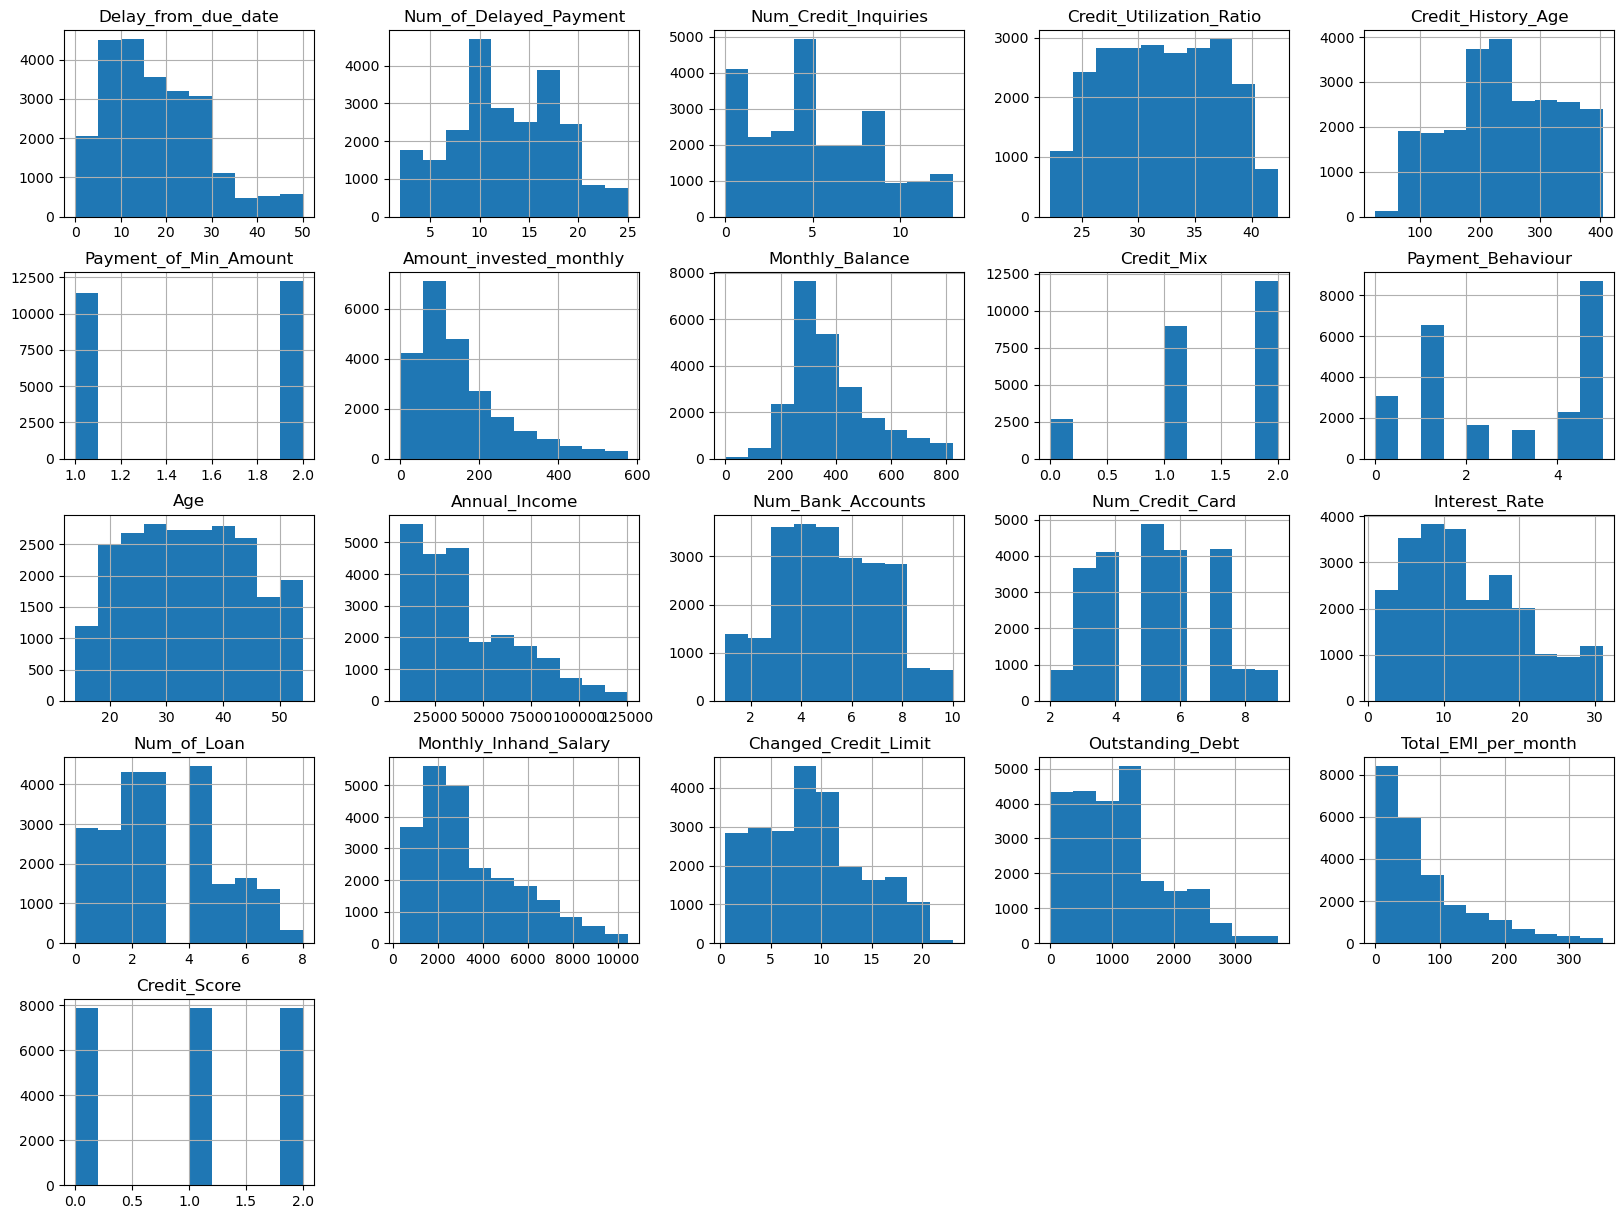

In [41]:
ft.hist(figsize=(20,15))

In [45]:
import numpy as np

columns = ['Interest_Rate','Outstanding_Debt']
ft[columns] = np.log1p(ft[columns]) 


In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

features, targets = ft.iloc[:, :-1], ft.Credit_Score

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

# smote = SMOTE(random_state=124)
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

dtc.fit(X_train_over.values, y_train_over.values)



evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

# y_train_over.value_counts()

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


lgbm_parameters = {
    'lgbm__n_estimators': [150,200,250,300],
    'lgbm__learning_rate': [0.3, 0.5,0.7, 1]
}


lgbm = LGBMClassifier()

lgbm_pipe = Pipeline([('standard_scaler', StandardScaler()), ('lgbm', lgbm)])
g_lgbm = GridSearchCV(lgbm_pipe, param_grid=lgbm_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)




In [48]:
g_lgbm.fit(X_train, y_train, lgbm__eval_set=evals)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2499
[LightGBM] [Info] Number of data points in the train set: 18897, number of used features: 20
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('lgbm', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'lgbm__learning_rate': [0.3, 0.5, 0.7, 1],
                         'lgbm__n_estimators': [150, 200, 250, 300]},
             return_train_score=True)

,params,mean_test_score,rank_test_score
0,"{'lgbm__learning_rate': 0.3, 'lgbm__n_estimato...",0.788750,5
1,"{'lgbm__learning_rate': 0.3, 'lgbm__n_estimato...",0.790655,3
2,"{'lgbm__learning_rate': 0.3, 'lgbm__n_estimato...",0.792189,2
3,"{'lgbm__learning_rate': 0.3, 'lgbm__n_estimato...",0.792983,1
4,"{'lgbm__learning_rate': 0.5, 'lgbm__n_estimato...",0.782981,15
5,"{'lgbm__learning_rate': 0.5, 'lgbm__n_estimato...",0.785998,9
6,"{'lgbm__learning_rate': 0.5, 'lgbm__n_estimato...",0.788379,7
7,"{'lgbm__learning_rate': 0.5, 'lgbm__n_estimato...",0.790020,4
8,"{'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...",0.783193,14
9,"{'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...",0.785363,11


오차 행렬
[[1370   20  185]
 [  55 1308  212]
 [ 184  206 1185]]
정확도: 0.8176, 정밀도: 0.8177, 재현율: 0.8176, F1: 0.8176
################################################################################


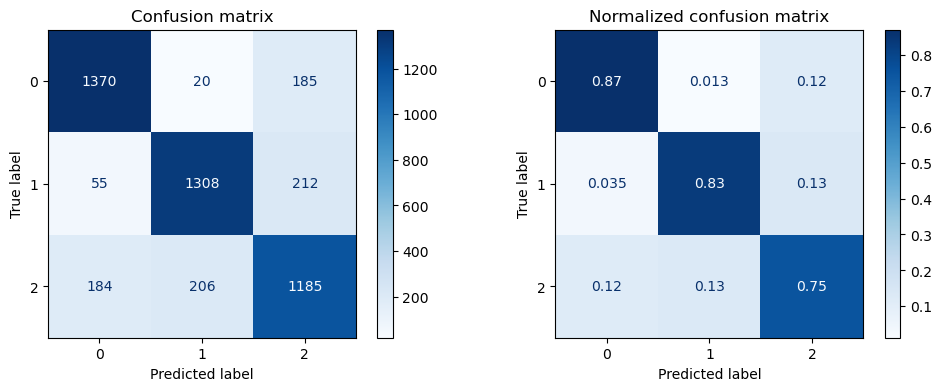

In [49]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(lgbm_result_df)
lgbm = g_lgbm.best_estimator_

prediction = lgbm.predict(X_test)
get_evaluation(y_test, prediction, lgbm, X_test)

2 Cycle

f1 score 0.8 이상으로 높임